## Python statistics essential training - 03_03_histograms

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [13]:
import matplotlib
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [7]:
ch65 = pd.read_csv('income-1965-china.csv')
ch15 = pd.read_csv('income-2015-china.csv')
us65 = pd.read_csv('income-1965-usa.csv')
us15 = pd.read_csv('income-2015-usa.csv')

In [8]:
ch65.head()

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402


# [box plots](https://aiaspirant.com/box-plot/) 
helps us to study the distribution of the data and to spot the outliers effectively. It is a very convenient way to visualize the spread and skew of the data. It is created by plotting the five-number summary of the dataset: minimum, first quartile, median, third quartile, and maximum.

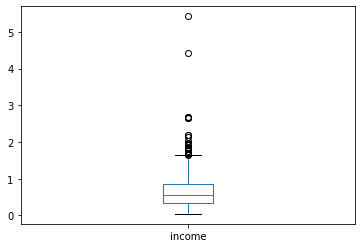

In [5]:
ch65['income'].plot(kind='box')

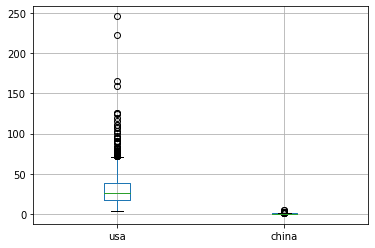

In [6]:
# comparing chinas income to the usas income
pd.DataFrame({'usa':us65.income, 'china':ch65.income}).boxplot()

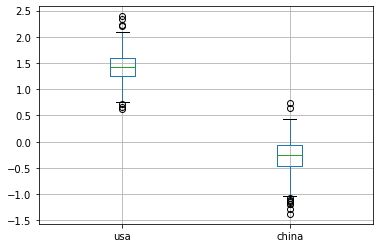

In [9]:
# the scales are so different that we dont see much information, so its better to make a boxplot using the 
# log scaled data
pd.DataFrame({'usa':us65.log10_income, 'china':ch65.log10_income}).boxplot()

# [Histograms](https://www.thoughtco.com/what-is-a-histogram-3126359)
Histograms provide a visual interpretation of numerical data by indicating the number of data points that lie within a range of values. These ranges of values are called classes or bins. The frequency of the data that falls in each class is depicted by the use of a bar. The higher that the bar is, the greater the frequency of data values in that bin.

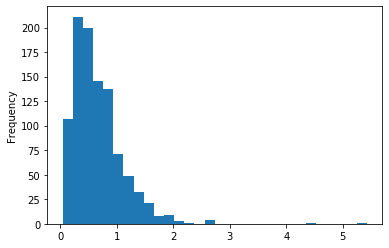

In [12]:
ch65['income'].plot(kind='hist',bins = 30)

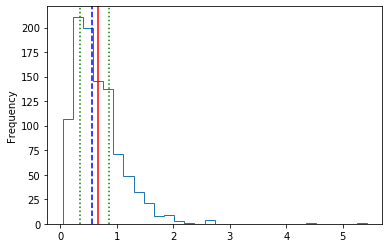

In [26]:
# plotting some other descriptive statistics on top of the histograph
# histtype makes the bins clear
ch65['income'].plot(kind='hist',bins = 30,histtype='step')

plt.axvline(ch65['income'].mean(),c = 'red')
plt.axvline(ch65['income'].median(),c = 'blue',linestyle = '--')
plt.axvline(ch65['income'].quantile(.25),c = 'green',linestyle = ':')
plt.axvline(ch65['income'].quantile(.75),c = 'green',linestyle = ':')

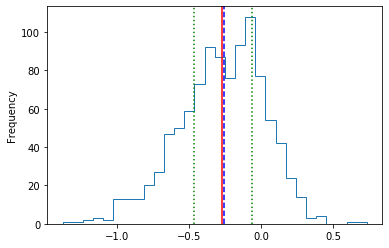

In [27]:
# same thing but with the log scale (distribution should look more normal)
ch65['log10_income'].plot(kind='hist',bins = 30,histtype='step')

plt.axvline(ch65['log10_income'].mean(),c = 'red')
plt.axvline(ch65['log10_income'].median(),c = 'blue',linestyle = '--')
plt.axvline(ch65['log10_income'].quantile(.25),c = 'green',linestyle = ':')
plt.axvline(ch65['log10_income'].quantile(.75),c = 'green',linestyle = ':')

# Density Plot
A density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable (see more). It is a smoothed version of the histogram and is used in the same concept.


(0, 3, 0.0, 1.2342999882944066)

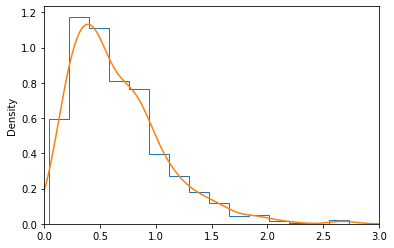

In [31]:
ch65.income.plot(kind='hist',histtype='step',bins=30, density=True)
ch65.income.plot.density()

# constraints how much is shown
plt.axis(xmin = 0, xmax = 3)

# Comparing the log income in the USA to China (1965)
As we can see from the graphs there is no overlap. This means that the poorest americans are richer than the richest person in china.

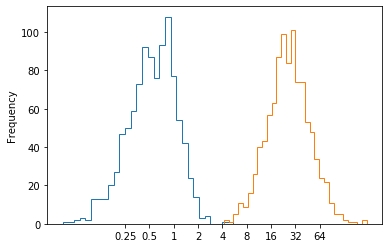

In [38]:
ch65.log10_income.plot.hist(histtype='step',bins=30)
us65.log10_income.plot.hist(histtype='step',bins=30)

# showing the x-axis ticks in dollars
levels = [.25,.5,1,2,4,8,16,32,64] # multiples of 2
plt.xticks(np.log10(levels),levels);

# Comparing the log income in the USA to China (2015)
Here we can see that the graphs look drastically different. We see that both the chinese and americans are richer than in 1965, and we also see that the richest chinese is no longer poorer than the porest american.


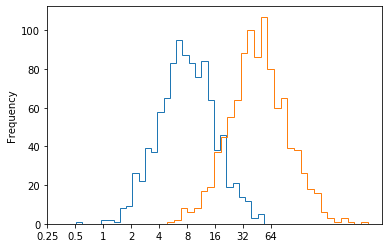

In [39]:
ch15.log10_income.plot.hist(histtype='step',bins=30)
us15.log10_income.plot.hist(histtype='step',bins=30)

# showing the x-axis ticks in dollars
levels = [.25,.5,1,2,4,8,16,32,64] # multiples of 2
plt.xticks(np.log10(levels),levels);

### Rescale the histograms to show the reletive size of the population
Get the population for both regions using the gapminder dataset

In [40]:
df = pd.read_csv('gapminder.csv')
pop_ch = float(df.query('country == "China" and year == 2015').population)
pop_us = float(df.query('country == "United States" and year == 2015').population)

In [41]:
pop_ch, pop_us

(1376048943.0, 321773631.0)

In [42]:
# create a new column 'weight' to create the weighted histogram
# the weight column will be equal to the population divided by the number of observations
ch15['weight'] = pop_ch / len(ch15)
us15['weight'] = pop_us / len(us15)

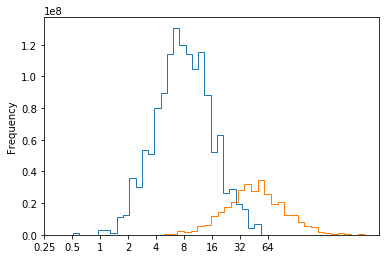

In [44]:
# now we can add the weights to the histogram
ch15.log10_income.plot.hist(histtype='step',bins=30, weights = ch15.weight)
us15.log10_income.plot.hist(histtype='step',bins=30, weights = us15.weight)

# showing the x-axis ticks in dollars
levels = [.25,.5,1,2,4,8,16,32,64] # multiples of 2
plt.xticks(np.log10(levels),levels);